In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import scipy.stats as stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

In [2]:
%cd C:\Users\noahc\Jupyter\FirstSteps

C:\Users\noahc\Jupyter\FirstSteps


In [3]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
#Slicing for feature selection with stats measures
sliced_features = df.iloc[:,1:7]
sliced_labels = df['Y']
sliced_features.head()

#feature selection
fs = SelectKBest(score_func=f_classif, k=4)
X_selected = fs.fit_transform(sliced_features, sliced_labels)

#Checking which features where selected
filter = fs.get_support()
feat = np.array(sliced_features.columns)
print('Total Features ', feat)
print('Selected Features for training ',feat[filter])

#removing outliers
#only keep rows in dataframe with all z-scores less than absolute value of 3 
z = np.abs(stats.zscore(X_selected))
X_clean = X_selected[(z<3).all(axis=1)]
y_clean = sliced_labels[(z<3).all(axis=1)]

#Balancing Dataset
#sm = SMOTE()
#X_clean, y_clean = sm.fit_resample(X_clean, y_clean)

#scale and normalize the dataset
scaling = StandardScaler()
X_clean = scaling.fit_transform(X_clean)

Total Features  ['X1' 'X2' 'X3' 'X4' 'X5' 'X6']
Selected Features for training  ['X1' 'X3' 'X5' 'X6']


In [5]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_clean,random_state=42)

In [6]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)
print(X_train.shape)
print(X_test.shape)

(106, 4)
(32, 4)


              precision    recall  f1-score   support

           0       0.53      0.56      0.55        16
           1       0.53      0.50      0.52        16

    accuracy                           0.53        32
   macro avg       0.53      0.53      0.53        32
weighted avg       0.53      0.53      0.53        32


Best Parameters of Decision Tree model are : {'criterion': 'gini', 'max_depth': 2}



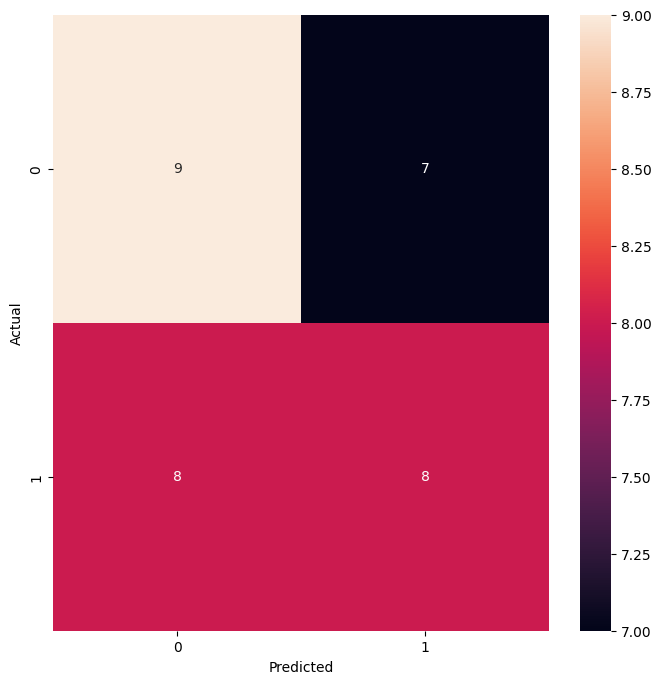

In [7]:
param_grid={ 'criterion':['gini', 'entropy'], 'max_depth':[2,4,6,8,10,12]}
dtc=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
confusion_dtc=confusion_matrix(y_test,dtc.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_dtc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_dtc))
print(f'\nBest Parameters of Decision Tree model are : {dtc.best_params_}\n')

              precision    recall  f1-score   support

           0       0.73      0.50      0.59        16
           1       0.62      0.81      0.70        16

    accuracy                           0.66        32
   macro avg       0.67      0.66      0.65        32
weighted avg       0.67      0.66      0.65        32


Best Parameter: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 300}



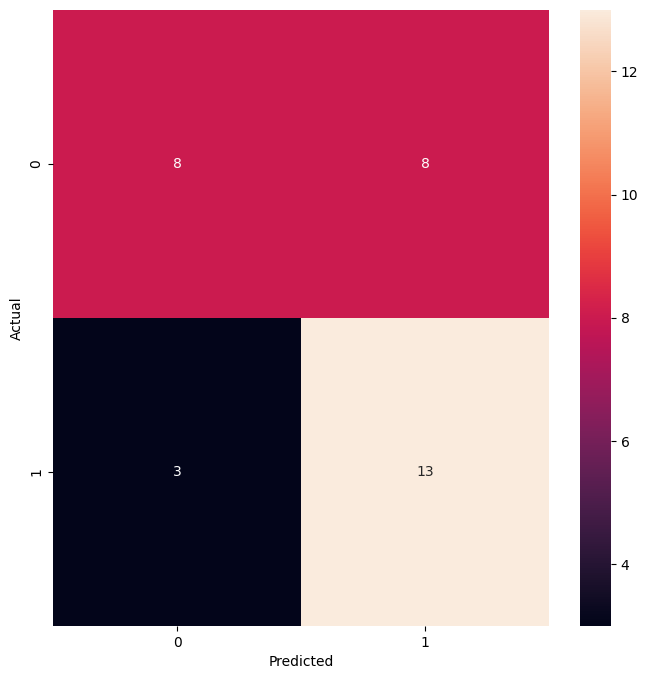

In [8]:
param_grid = {
    'n_estimators': [50, 75,100, 150, 200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,16],
    'criterion' :['gini', 'entropy']
}
rfc=GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
confusion_rfc=confusion_matrix(y_test,rfc.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rfc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rfc))
print(f'\nBest Parameter: {rfc.best_params_}\n')

              precision    recall  f1-score   support

           0       0.73      0.50      0.59        16
           1       0.62      0.81      0.70        16

    accuracy                           0.66        32
   macro avg       0.67      0.66      0.65        32
weighted avg       0.67      0.66      0.65        32


Best Parameter: {'learning_rate': 0.05, 'n_estimators': 75}



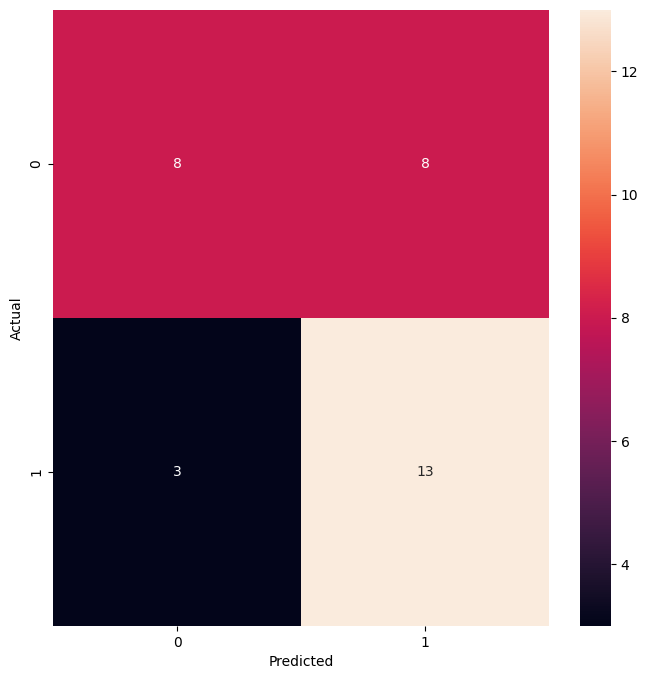

In [9]:
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

              precision    recall  f1-score   support

           0       0.75      0.56      0.64        16
           1       0.65      0.81      0.72        16

    accuracy                           0.69        32
   macro avg       0.70      0.69      0.68        32
weighted avg       0.70      0.69      0.68        32



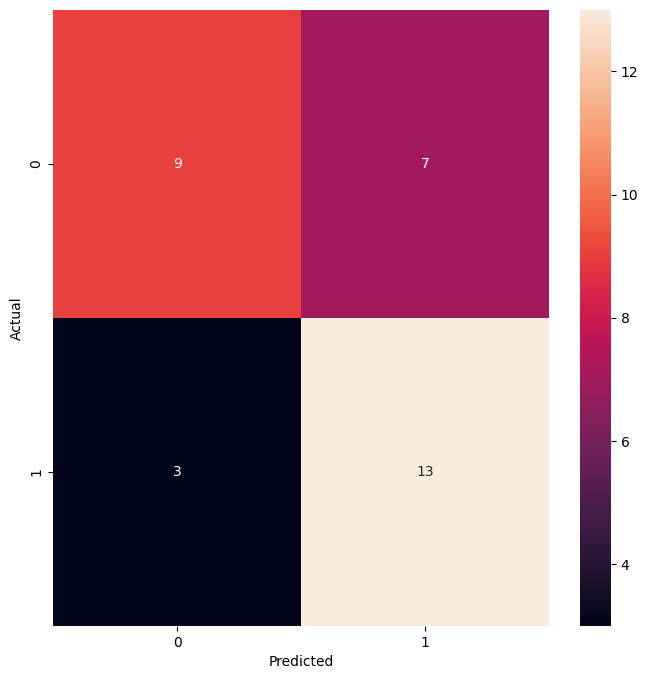

In [13]:
estimator = []
estimator.append(('RFC', 
                   RandomForestClassifier(criterion='gini', n_estimators=150, max_features='log2', max_depth= 6)))
estimator.append(('DTC', DecisionTreeClassifier(criterion='gini', max_depth=10)))
estimator.append(('GBC', GradientBoostingClassifier(n_estimators=50, learning_rate=0.05)))
            
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train,y_train)
y_pred= vot_hard.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))